In [38]:
import numpy as np
import matplotlib.pyplot as plt

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

# Define simulation parameters
n = 270
N = 1024
k = 40
sigma = 0.05
s = 0.2
lambda_ = 0.1

In [49]:
A = np.sqrt(1/n)*np.random.randn(n, N)

x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
x[idx_nonzero_entries] = 1

w = sigma*np.random.randn(n).reshape(-1, 1)
w1 = sigma*np.random.randn(n).reshape(-1,1)

y = A @ x + w 
yb = A @ x + w1

z = np.zeros(y.shape)

xHt = np.zeros(x.shape)

In [50]:
num_iterations = 150
mse_1bs = np.zeros(num_iterations)
for i in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s* A.T @ z
    xHt = eta(r, s*lambda_)
    err_sum = np.sum((x-xHt)**2)
    mse_1bs[i] = (1/N) * err_sum
print(mse_1bs[0])

0.029327282980879384


In [51]:
mse_1bs_plot = np.zeros(num_iterations // 2)
for i in range(num_iterations):
    if i % 2 == 1:
        mse_1bs_plot[i//2] = mse_1bs[i]

In [52]:
# reset params for 2 bs
num_iterations = num_iterations // 2
xHt = np.zeros(x.shape)
mse_2bs = np.zeros(num_iterations)

for idx_iter in range(num_iterations): 
    za = y - A @ xHt
    r = xHt + s * A.T @ za
    xHt = eta(r, s*lambda_)
    err_sum1 = np.sum((x - xHt)**2)

# do the same for second vector
    zb = yb - A @ xHt
    r = xHt + s * A.T @ zb
    xHt = eta(r, s*lambda_)
    err_sum2 = np.sum((x - xHt)**2)
    
    mse_2bs[idx_iter] = (1/(2*N)) * (err_sum1 +  err_sum2)
print(num_iterations)
print(mse_2bs.shape)
print(mse_1bs_plot.shape)

75
(75,)
(75,)


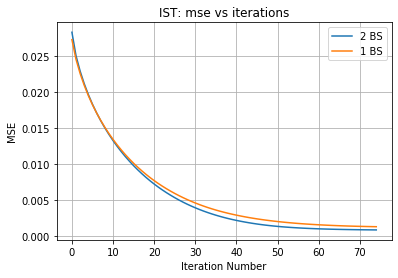

In [53]:
# Plot results
plt.figure()
plt.plot(range(num_iterations), mse_2bs, label="2 BS")
plt.plot(range(num_iterations), mse_1bs_plot, label="1 BS")
plt.legend()
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("IST: mse vs iterations")
plt.show()

In [44]:
print(mse_1bs_plot)

[0.02972773 0.02745692 0.02585491 0.02453027 0.02337955 0.02235307
 0.02142105 0.02056876 0.01977749 0.01903707 0.01833995 0.01768169
 0.01705775 0.01646429 0.01589794 0.01535681 0.01483946 0.01434407
 0.01387066 0.01341734 0.01298346 0.0125682  0.01217027 0.01178954
 0.01142456]
